In [2]:
import sympy as sp
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
sp.init_printing() # doctest: +SKIP

In [3]:
i

In [3]:
SDE = a*X+sigma*X*W+tau*U
SDE

Suppose that we have the following SDE:
$$dX_t  = aX\:dt +\sigma X \:dW+\tau\: dU$$
Where $W$ and $V$ are standard brownian motion with constant covariance $\rho$. Then let $\tilde V= U-\rho W$, the covariance $$\mathbb{E}(W\tilde V)=\mathbb{E}(WU)-\mathbb{E}(W\rho W)=\rho-\rho=0.$$
So $V$ and $W$ are independent, and 
$$\mathbb{E}(\tilde V\tilde V)=\mathbb{E}((U-\rho W)^2)=\mathbb{E}(U^2)-2\rho\mathbb{E}(U W) +\rho^2\mathbb{E}(W^2)=1-2\rho^2+\rho^2 = 1-\rho^2$$
So that $V=\tilde V/\sqrt{1-\rho^2}$ is a standard brownian motion independent of $W$.
Thus, with the substitutions:
$$U = \tilde V+\rho W = \sqrt{1-\rho^2} V+\rho W,\text{ and }$$
$$X = Y-\frac{\tau\rho}{\sigma}$$
We may then rewrite the differential equation as:

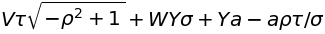

In [4]:
SDE_1 = sp.simplify(SDE.subs({U:sp.sqrt(1-rho**2)*V+rho*W, X:Y-tau*rho/sigma}))
SDE_1

Let $\mu = \frac{\tau\rho}{\sigma}$ and $\omega = \tau\sqrt{1-\rho^2}$, then we get

In [5]:
SDE_2 = sp.simplify(SDE_1.subs({tau*sp.sqrt(1-rho**2):omega, rho:sigma*mu/tau}))
SDE_2

so $$dY_t  = a(Y-\mu)\:dt +\sigma Y \:dW+\omega\: dV$$
$$A(Y)=a(Y-\mu)$$
$$D(Y)=\frac{1}{2}\left(\begin{smallmatrix}\sigma Y & \omega\end{smallmatrix}\right)\left(\begin{smallmatrix}\sigma Y \\ \omega\end{smallmatrix}\right) = \frac{\sigma^2}{2} Y^2+\frac{\omega^2}{2}$$

The Fokker-Plank equation https://en.wikipedia.org/wiki/Fokker%E2%80%93Planck_equation for the stationary distribution $p(y)$ becomes the ODE

$$0=-\frac{\partial}{\partial y}(A(y)p(y)) + \frac{\partial^2}{\partial y^2}(D(y)p(y))$$

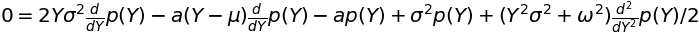

In [6]:
P = sp.Function("p")
A = a*(Y-mu)
D = sigma**2*Y**2/2+omega**2/2

eq = sp.simplify(-(A*P(Y)).diff(Y)+(D*P(Y)).diff(Y,2))
sp.Eq(0,eq)

Let's simplify subsequent manipulations by isolating the coefficients, i.e. considering the equation:
$$0 = a_0 p(y)+a_1 \frac{\partial}{\partial y}p(y)+a_2 \frac{\partial^2}{\partial y^2}p(y)$$

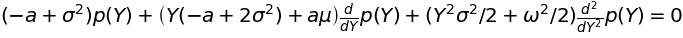

In [7]:
a_2 = (Y**2*sigma**2+omega**2)/2
a_1 = (2*sigma**2-a)*Y+a*mu
a_0 = sigma**2-a
eq_ = a_2*P(Y).diff(Y,2)+a_1*P(Y).diff(Y)+a_0*P(Y)
sp.Eq(eq_,0)

In [8]:
# To check for equality:
sp.simplify(eq_-eq)

Now, let's introduce an auxiliary variable $q = \frac{\partial p}{\partial y}$ so that we can rewrite this as a system of first order ode's:
$$\frac{\partial p}{\partial y} = q, \quad\quad \frac{\partial q}{\partial y}=\frac{-a_1}{a_2}q+\frac{-a_0}{a_2}p$$

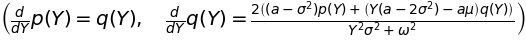

In [9]:
Q = sp.Function("q")
eq_p = Q(Y)
eq_q = sp.simplify(-Q(Y)*a_1/a_2-P(Y)*a_0/a_2)
sp.Eq(P(Y).diff(Y), eq_p), sp.Eq(Q(Y).diff(Y), eq_q)

Now, we can solve this ode numerically (for specific values):

In [10]:
subst = {
    a: 1,
    sigma: 2,
    tau: -.25,
    rho: -0.99,
    mu: tau*rho/sigma,
    omega: tau*sp.sqrt(1-rho**2),
    P(Y): p,
    Q(Y): q,
    Y: X+tau*rho/sigma
}
f_p = sp.lambdify((p,q,X), eq_p.subs(subst), "numpy")
f_q = sp.lambdify((p,q,X), eq_q.subs(subst), "numpy")

def fun(t, y):
    p = y[0]
    q = y[1]
    return np.array([f_p(p,q,t), f_q(p,q,t)])



In [11]:
y_span = (-2,2)
y_0 = np.array([.1, .1])
sol = scipy.integrate.solve_ivp(fun, y_span, y_0)

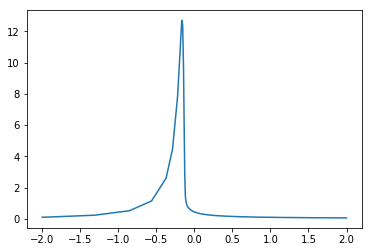

In [12]:
plt.plot(sol["t"],sol["y"][0,:])

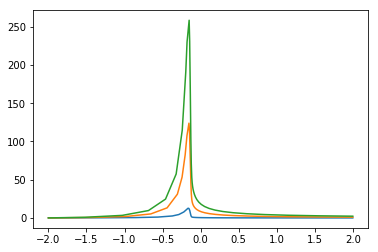

In [13]:
y_span = (-2,2)
y_0 = np.array([.1, .1])
sol = scipy.integrate.solve_ivp(fun, y_span, y_0)
plt.plot(sol["t"],sol["y"][0,:])

y_span = (-2,2)
y_0 = np.array([.1, .5])
sol = scipy.integrate.solve_ivp(fun, y_span, y_0)
plt.plot(sol["t"],sol["y"][0,:])

y_span = (-2,2)
y_0 = np.array([.1, 1])
sol = scipy.integrate.solve_ivp(fun, y_span, y_0)
plt.plot(sol["t"],sol["y"][0,:])

plt.show()

In [14]:
x = [35.66, 35.71, 31.48, 30.42, 28.18, 26.02, 21.31, 19.17, 16.29, 19.34, 18.92, 13.87, 14.24, 15.43, 12.59, 12.81, 12.63, 12.07, 8.78, 7.4, 5.9][::-1]
z = [41277, 31480, 34887, 31105, 20268, 19634, 22814, 11343, 9972, 7394, 10977, 7710, 11106, 8553, 14778, 5996, 8765, 10204, 9820, 10396, 10120][::-1]

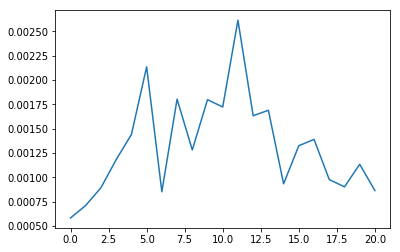

In [15]:
plt.plot(np.array(x)/np.array(z))

In [16]:
eq.subs({
    mu: tau*rho/sigma,
    omega: tau*sp.sqrt(1-rho**2),
    Y: X+tau*rho/sigma,
}).simplify()

                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
      ⎛d       ⎞│                 ⎛X⋅σ + ρ⋅τ⎞    2  ⎛X⋅σ + ρ⋅τ⎞               
- X⋅a⋅⎜──(p(Y))⎟│  X⋅σ + ρ⋅τ - a⋅p⎜─────────⎟ + σ ⋅p⎜─────────⎟ + 2⋅σ⋅(X⋅σ + ρ
      ⎝dY      ⎠│Y=─────────      ⎝    σ    ⎠       ⎝    σ    ⎠               
                       σ                                                      

                                                            ⎛  2      ⎞│      
                             ⎛ 2 ⎛   2    ⎞              2⎞ ⎜ d       ⎟│      
                             ⎝τ ⋅⎝- ρ  + 1⎠ + (X⋅σ + ρ⋅τ) ⎠⋅⎜───(p(Y))⎟│      
                                                   

Here we verify the following explicit solution to the Fokker-Planck equation:

In [17]:
g = sp.exp(-2*a*mu/(omega*sigma)*sp.atan(sigma*Y/omega))*(sigma**2*Y**2+omega**2)**(-1+a/sigma**2)
g

In [18]:
print(sp.latex(g))

\left(Y^{2} \sigma^{2} + \omega^{2}\right)^{\frac{a}{\sigma^{2}} - 1} e^{- \frac{2 a \mu \operatorname{atan}{\left (\frac{Y \sigma}{\omega} \right )}}{\omega \sigma}}


In [19]:
g.subs({Y:Z*omega/sigma}).simplify()

$g$ should satisfy the equation $J=0$, where $J=-Ag+\frac{\partial}{\partial y} (D g)$

In [168]:
J=-A*g+(D*g).diff(Y)
sp.simplify(J)

So $p'/p = (A-D')/D$

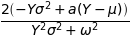

In [172]:
pp_o_p = sp.simplify((A-D.diff(Y))/D)
pp_o_p

In the notation of https://en.wikipedia.org/wiki/Pearson_distribution we have 

In [185]:
n_p = 2*(a-sigma**2)
a_p = -2*a*mu/n_p
b_0 = -omega**2/n_p
b_1 = 0
b_2 = -sigma**2/n_p
pp_p_p_pears = (a_p+Y)/(b_0+b_1*Y+b_2*Y**2)
sp.simplify(pp_p_p_pears+pp_o_p)

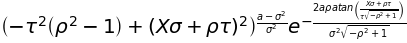

In [20]:
g.subs({mu: tau*rho/sigma,
    omega: tau*sp.sqrt(1-rho**2),
    Y: X+tau*rho/sigma}).simplify()

We graph some solutions:

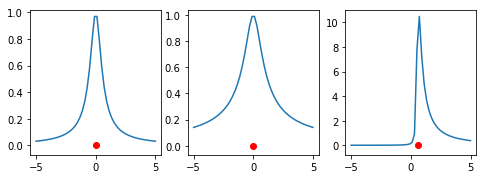

In [282]:
opts = [
    {
        a: 1,
        sigma: 2,
        tau: -1,
        rho: 0,
    },
    {
        a: 1,
        sigma: np.sqrt(2),
        tau: -1,
        rho: 0,
    },
    {
        a: 1,
        sigma: 2,
        tau: -1,
        rho: 0.95,
    },
]
width = 8
fig, axes = plt.subplots(1, len(opts), figsize=(width,width/len(opts)))
for ax, opts in zip(axes, opts):
    g_l = sp.lambdify(X, g.subs({
        mu: tau*rho/sigma,
        omega: tau*sp.sqrt(1-rho**2),
        P(Y): p,
        Q(Y): q,
        Y: X+tau*rho/sigma
    }).subs(opts),"numpy")

    x = np.linspace(-5,5,50)
    ax.plot(x, g_l(x))

    mode= a*mu/(a-sigma**2)

    mm = float((mode-tau*rho/sigma).subs({
        mu: tau*rho/sigma,
        omega: tau*sp.sqrt(1-rho**2),
    }).subs(opts))
    ax.scatter([mm], [0] , color="r")
plt.show()

Verify that $g$ solves the conserverd "Flux" ode,
$J(y) := -A(y)*g(y)+\frac{\partial}{\partial y}(D(y) g(y)=0$


In [89]:
eq__ = -(A*g)+(D*g).diff(Y)

In [90]:
eq__.simplify()

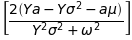

In [91]:
sp.solve(((-(A*P(Y))+(D*P(Y)).diff(Y))/P(Y)).expand().subs({P(Y).diff(Y)/P(Y): Q(Y)}), Q(Y))

Compute the mode:

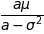

In [109]:
mode = sp.solve((A-D.diff(Y)), Y)[0]
mode

Verify the mode

In [107]:
(A-D.diff(Y)).subs({Y:a*mu/(a-sigma**2)}).simplify()

In [108]:
print(sp.latex((A-D.diff(Y)).simplify()))

- Y \sigma^{2} + a \left(Y - \mu\right)


In [92]:
g.diff(Y).subs({Y:a*mu/(a-sigma**2)}).simplify()

Compute the mode in $x$ coordinates

In [114]:
print(sp.latex(X.subs({
    X: Y - tau*rho/sigma,
    Y: mode,
    mu: tau*rho/sigma,
    omega: tau*sp.sqrt(1-rho**2)
}).simplify()))

\frac{\rho \sigma \tau}{a - \sigma^{2}}


In coordinates $\theta = \operatorname{atan}(y\sigma/\omega)$

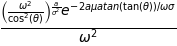

In [99]:
h = (g*(1+Z**2)).subs({
    Y:Z*omega/sigma,
    Z:sp.tan(theta)
}).simplify()
h

In [97]:
hh = (sp.cos(theta)**(1/sigma)*sp.exp(mu*theta/omega))**(-2*a/sigma)
hh

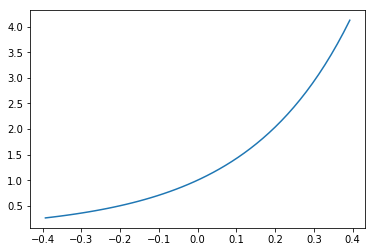

In [98]:
hh_l = sp.lambdify(theta, hh.subs({
    a: 1,
    sigma: 2,
    tau: -.25,
    rho: -0.99,
    mu: tau*rho/sigma,
    omega: tau*sp.sqrt(1-rho**2),
}),"numpy")

x = np.linspace(-np.pi/8, np.pi/8, 50)
plt.plot(x, hh_l(x))

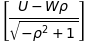

In [95]:
sp.solve(-U + sp.sqrt(1-rho**2)* V+rho* W, V)

Computing the parameters for the Student t-distribution (when $\rho=0$):

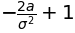

In [134]:
eq_stt = (nu+1)/2+(a-sigma**2)/sigma**2
std_t_deg_frd = sp.solve(eq_stt, nu)[0]
std_t_deg_frd

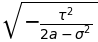

In [136]:
std_t_scale = sp.sqrt(sp.simplify(omega**2/(sigma**2*std_t_deg_frd)).subs({    
    mu: tau*rho/sigma,
    omega: tau*sp.sqrt(1-rho**2),
    rho: 0
}))
std_t_scale

Substitute these into the Student t-distribution

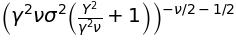

In [157]:
std_t = (sigma**2*gamma**2*nu*(1+(Y/gamma)**2/nu))**(-(nu+1)/2)
std_t

In [158]:
sp.simplify((g/std_t).subs({
    nu: std_t_deg_frd, 
    gamma:std_t_scale,
    tau: omega/sp.sqrt(1-rho**2),
    mu: tau*rho/sigma
}).subs({rho:0}))

Compute the inverse gamma distribution:

In [233]:
inv_gamma = (1/sp.Abs(Y))**(alpha+1)*sp.exp(-beta/Y)
inv_gamma

In [179]:
C_1=b_1/(2*b_2)
lamb_p = -(a_p-C_1)/(1-2*b_2)

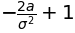

In [187]:
sp.simplify(1/b_2 -1)

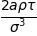

In [272]:
((a_p-C_1)/b_2).subs({
    mu: tau*rho/sigma,
})

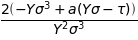

In [192]:
correlated_eq = sp.simplify(pp_o_p.subs({
    mu: tau*rho/sigma,
    omega: tau*sp.sqrt(1-rho**2),
    rho: 1
}))
correlated_eq

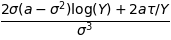

In [195]:
int_correlated = sp.integrate(correlated_eq, Y)
int_correlated

In [201]:
correlated_p = Y**(2*(a-sigma**2)/sigma**2)*sp.exp(2*a*tau/(Y*sigma**3))
correlated_p

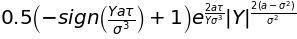

In [267]:
pp_e = sp.simplify(0.5*((sp.sign(beta*Y) +1)*inv_gamma).subs({
    alpha: sp.simplify(1/b_2 -1),
    beta: (-(a_p-C_1)/b_2),
    mu: tau*rho/sigma,
    rho: 1
}))
pp_e

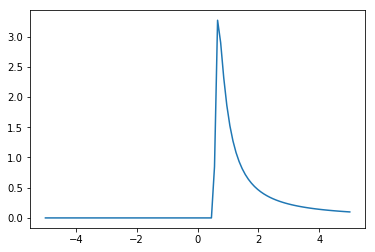

In [281]:
opts = {
    a: 1,
    sigma: 2,
    tau: -1,
    rho: 1,
}

ig_l = sp.lambdify(X, pp_e.subs({
    mu: tau*rho/sigma,
    omega: tau*sp.sqrt(1-rho**2),
    P(Y): p,
    Q(Y): q,
    Y: X+tau*rho/sigma
}).subs(opts),"numpy")

x = np.linspace(-5,5,100)
plt.plot(x, ig_l(x))

In [248]:
sp.sign(-5)

Trajectories of Geometric brownian motion:

In [96]:
dt = .1
TT = 100
a_np = .5
sigma_np = 1.2
x = np.arange(0, 100, dt)
white_noise = np.cumsum(np.sqrt(dt)*np.random.normal(0, 1.0, x.size)/dt)
y=np.minimum(np.exp(dt*((a_np-(sigma_np)**2/2)*x+sigma_np*white_noise)), 100)

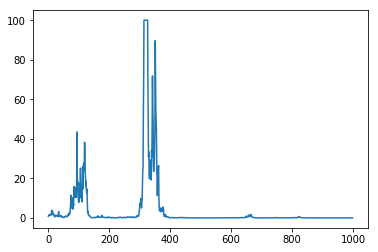

In [102]:
plt.plot(y)

In [19]:
np.max?